## Projected subgradient method

Projected subgradient method solves the following problem:

\begin{align}
&\textrm{minimize} \quad f(x) \\
&\textrm{subject to}\quad x \in \mathcal{C},
\end{align}

where $\mathcal{C}$ is a convex set. The projected subgradient algorithm is given by 

\begin{align}
x^{(k+1)}=\Pi(x^{(k)}-\alpha_k g^{(k)}),
\end{align}

where $\Pi$ is the Eucledian projection on $\mathcal{C}$ and $g^{(k)} \in \partial f(x^{k})$. Projected subgradient method converges for square summable but nonsummable sequence.

For an example of the projected subgradient method, we will consider the following problem

\begin{align}
&\textrm{minimize} \quad \|x\|_1 \\
&\textrm{subject to}\quad A x=b.
\end{align}

Subgradient of the objective is $g=\mathop{\bf sign}(x)$, and the projected subgradient update can be shown to be equal to

\begin{align}
x^{(k+1)}=x^{(k)}-\alpha_k (I-A^T (A A^T)^{-1} A) \mathop{\bf sign}(x^{(k)}).
\end{align}

First, we generate the problem data.

In [1]:
# Problem Data
#-------------
n=1000# Number of variables
m=50 # Number of equality constraints
A=randn(m,n)
b=randn(m,1)

50x1 Array{Float64,2}:
 -0.0919046
 -1.73832  
 -0.261878 
  0.235227 
 -0.461352 
 -0.387963 
  1.46303  
 -0.358916 
  1.94828  
 -1.42807  
  1.34524  
  0.79627  
 -2.88483  
  ⋮        
  0.308558 
  0.906538 
 -0.866688 
 -0.15844  
 -0.0174994
 -2.20293  
 -0.0895742
  0.212372 
 -1.89722  
  1.97011  
  1.90722  
 -0.256385 

Next, we solve the problem using `Convex` and store the result.

In [2]:
# Solving using convex
#---------------------
using Convex
using SCS
xCvx=Variable(n)
problem=minimize( norm(xCvx,1),
#     subject to
                A*xCvx==b)

solve!(problem, SCSSolver())

print(
"The status of the solution is ", problem.status,
"\nwith optimal objective value, f(x*)=", problem.optval,
)
xMinValue=xCvx.value
fMinValue=problem.optval

The status of the solution is Optimal
with optimal objective value, f(x*)=3.4588700608981653

3.4588700608981653

To implement the projected subgradient method, we will need an initial feasible point first, which is calculated as follows.

In [3]:
#Finding an initial feasible point
#--------------------------------
x1=pinv(A)*b

1000x1 Array{Float64,2}:
  0.0240364  
  0.00322601 
  0.00706749 
  0.00409411 
  0.00746352 
 -0.00881291 
 -0.0152862  
 -0.0174223  
  0.00879352 
  0.00855339 
  0.00854437 
  0.0149058  
  0.00655985 
  ⋮          
  0.00413776 
  0.00218278 
 -0.00978155 
  0.0123685  
 -0.00127358 
 -0.00244719 
 -0.000425327
 -0.00678636 
  0.00174249 
 -0.00290414 
  0.0176197  
  0.0144888  

Now we write the function that will implement projected subgradient method.

In [4]:
# Function that will implement projected subgradient method
# ---------------------------------------------------------
function proj_sub_method_l1norm(
    A::Array{Float64,2},
    b::Array{Float64,2},
    x1::Array{Float64,2},
    a::Float64,
    maxIter::Int64
    )
fSet=Float64[] # We are creating an empty array where we will store the objective values as we progress
push!(fSet,Inf) # Intial value of f is infinity

fBest=Float64[] # It is an array where the last element will give f_best^{(k)} so far
push!(fBest, Inf) # Intial best value of f is infinity
M=eye(n)-A'*inv(A*A')*A # This is the matrix that is going to be used in updating x
  # x^{(k+1)}=x_{(k)}-\alpha_{k} M g^{(k)}
k=1
x=x1
while(k < maxIter)
        if (mod(k,100)==0)
            println("Iteration number=",k)
        end
# Value of the function at kth iteration
fKval=norm(x,1)
# Subgradient of ||x||₁ is sign(x)=(sign(x₁),...,sign(xₙ))
g=(x.>0)-(x.<0)

#step size selection
α=a/k

# Push the current value of f(x^(k)) in fSet
push!(fSet,fKval)

# Note how we are pushing the best f found so far in the last element of f
push!(fBest, min(fBest[end],fKval))
# Subgradient update:
x=x-α*M*g
k=k+1
end # while
return x, fSet, fBest
end # function

proj_sub_method_l1norm (generic function with 1 method)

Let's implement the function for $\alpha = \frac{0.1}{k}$ with $3000$ iterations, it will take a while.

In [5]:
a=0.1
maxIter=3000
(x, fSet, fBest)=proj_sub_method_l1norm(A, b, x1, 0.1 , maxIter)

Iteration number=100
Iteration number=200
Iteration number=300
Iteration number=400
Iteration number=500
Iteration number=600
Iteration number=700
Iteration number=800
Iteration number=900
Iteration number=1000
Iteration number=1100
Iteration number=1200
Iteration number=1300
Iteration number=1400
Iteration number=1500
Iteration number=1600
Iteration number=1700
Iteration number=1800
Iteration number=1900
Iteration number=2000
Iteration number=2100
Iteration number=2200
Iteration number=2300
Iteration number=2400
Iteration number=2500
Iteration number=2600
Iteration number=2700
Iteration number=2800
Iteration number=2900


(
1000x1 Array{Float64,2}:
  0.034866  
  1.74391e-5
 -1.28426e-5
 -1.91194e-5
  2.97604e-5
 -4.40247e-7
 -1.75819e-5
 -2.36156e-6
 -8.2196e-6 
 -1.35002e-5
  2.51517e-5
  4.26204e-5
  5.90888e-7
  ⋮         
  7.40681e-6
  2.93867e-5
 -3.64937e-5
  1.07317e-5
  2.95034e-5
 -2.05616e-5
  5.04441e-6
 -8.50729e-6
  3.87606e-5
 -4.59964e-6
  3.54789e-5
  4.17684e-6,

[Inf,6.83507,51.4776,25.4529,15.761,13.9468,10.8442,9.8673,8.86506,8.62762  …  3.49422,3.49436,3.49425,3.49415,3.4943,3.49406,3.49405,3.49436,3.49456,3.49399],[Inf,6.83507,6.83507,6.83507,6.83507,6.83507,6.83507,6.83507,6.83507,6.83507  …  3.49369,3.49369,3.49369,3.49369,3.49369,3.49369,3.49369,3.49369,3.49369,3.49369])

Finally we plot $f_\textrm{best}^{(k)}-f^{*}$ versus $k$.

In [10]:
#Plotting time # For some reason, Winston plot is throwing error, need to look into that later
#-------------
using Winston
iters=[1:maxIter]
figProjSub = FramedPlot(
title="The value of f_{best}^{(k)} - f^{*} vs. iteration number",
         xlabel="k",
         ylabel="f_{best}^{(k)} - f^{*}",
yrange=(1e-2,1e0),
ylog=true
)
xAxis=iters
curve1=fBest-fMinValue
bl=Curve(xAxis, curve1, color="blue")
setattr(bl, label="0.1/k")
le=Legend(.1,.1,{bl})
add(figProjSub,bl)

ErrorException: type cannot be constructed

In [39]:
# Trying in Gadfly
Pkg.add("Gadfly")

INFO: Nothing to be done


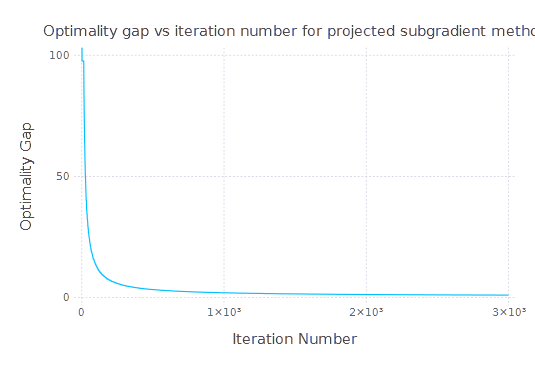

In [41]:
using Gadfly
curve1=abs((fBest-fMinValue)./fMinValue)*100
iters=[1:maxIter]
plot(
x=iters, 
y=curve1, 
Guide.ylabel("Optimality Gap"), # label for y-axis
Guide.xlabel("Iteration Number"),  # label for x-axis
Guide.title("Optimality gap vs iteration number for projected subgradient method"),  # a title
Geom.line
)